<a href="https://colab.research.google.com/github/daspartho/learn-pytorch/blob/main/datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [3]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading data...")
        f.write(request.content)

    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping data...")
        zip_ref.extractall(image_path)
print("Done!")

Did not find data/pizza_steak_sushi directory, creating one...
Unzipping data...
Done!


In [4]:
import os

def walk_dir(dir):
    for dirpath, dirnames, filenames in os.walk(dir):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

walk_dir(image_path)

There are 2 directories and 0 images in data/pizza_steak_sushi
There are 3 directories and 0 images in data/pizza_steak_sushi/test
There are 0 directories and 19 images in data/pizza_steak_sushi/test/steak
There are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza
There are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi
There are 3 directories and 0 images in data/pizza_steak_sushi/train
There are 0 directories and 75 images in data/pizza_steak_sushi/train/steak
There are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza
There are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi


In [5]:
train_dir = image_path / "train"
test_dir = image_path / "test"
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

Image path: data/pizza_steak_sushi/train/pizza/1633289.jpg
Image class: pizza
Image height: 384
Image eidth: 512


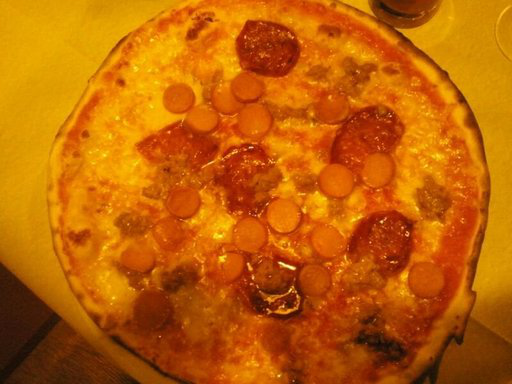

In [6]:
import random
from PIL import Image

image_path_list = list(image_path.glob("*/*/*.jpg"))

rand_image_path = random.choice(image_path_list)

image_class = rand_image_path.parent.stem

img= Image.open(rand_image_path)

print(f"Image path: {rand_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image eidth: {img.width}")
img

In [7]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [8]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.TrivialAugmentWide(),
    transforms.ToTensor()
])

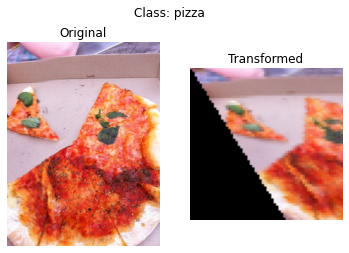

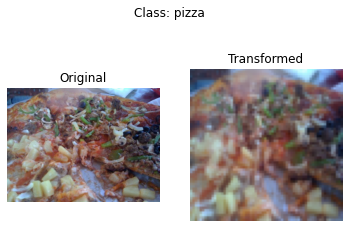

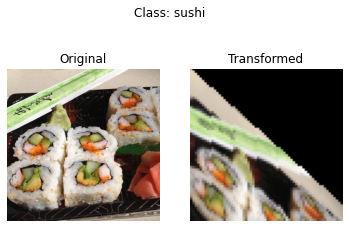

In [9]:
import matplotlib.pyplot as plt

def plot_transformed_images(image_paths, transform, n=3):

    random_image_paths = random.sample(image_paths, k=n)

    for image_path  in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1,2)
            ax[0].imshow(f)
            ax[0].set_title("Original")
            ax[0].axis(False)

            transformed_image = transform(f).permute(1,2,0)
            ax[1].imshow(transformed_image)
            ax[1].set_title("Transformed")
            ax[1].axis(False)

            fig.suptitle(f"Class: {image_path.parent.stem}")

plot_transformed_images(image_path_list, data_transform)

In [10]:
train_data = datasets.ImageFolder(root=train_dir, transform=data_transform)
test_data = datasets.ImageFolder(root=test_dir, transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ), Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ))

In [11]:
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [12]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image shape: {img.shape}")
print(f"Image label: {label}")

Image shape: torch.Size([3, 64, 64])
Image label: 0


Permuted image shape: torch.Size([64, 64, 3])


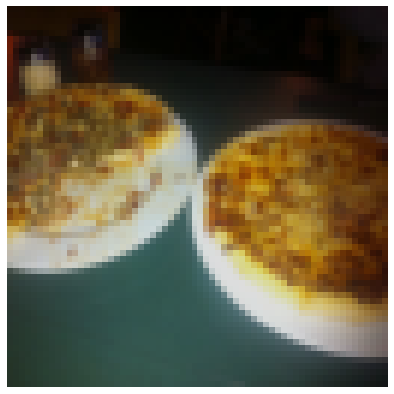

In [13]:
img_permute = img.permute(1,2,0)

print(f"Permuted image shape: {img_permute.shape}")

plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis(False);

In [14]:
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=16,
                              num_workers=1,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=16,
                              num_workers=1,
                              shuffle=False)

img, label = next(iter(train_dataloader))

img.shape, label.shape

(torch.Size([16, 3, 64, 64]), torch.Size([16]))

In [15]:
from torch.utils.data import Dataset
from typing import Tuple, Dict, List

In [16]:
target_directory = train_dir

class_names = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names

['pizza', 'steak', 'sushi']

In [17]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:

    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}")

    class_to_idx = {name: i for i, name in enumerate(classes)}

    return classes, class_to_idx

find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [18]:
class ImageFolderCustom(Dataset):

    def __init__(self, targ_dir: str, transform=None) -> None:

        self.paths = list(Path(targ_dir).glob("*/*.jpg"))
        self.transform = transform
        self.classes, self.class_to_idx = find_classes(targ_dir)

    def load_image(self, idx: int) -> Image.Image:
        image_path = self.paths[idx]
        return Image.open(image_path)

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, idx: int) -> Tuple[torch.Tensor, int]:
        img = self.load_image(idx)
        class_name = self.paths[idx].parent.name
        class_idx = self.class_to_idx[class_name]

        if self.transform:
            return self.transform(img), class_idx
        else:
            return img, class_idx

In [19]:
train_transforms = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.TrivialAugmentWide(),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [20]:
train_data = ImageFolderCustom(train_dir, train_transforms)
test_data = ImageFolderCustom(test_dir, test_transforms)

In [21]:
len(train_data)

225

In [22]:
train_data.classes

['pizza', 'steak', 'sushi']

In [23]:
train_data.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

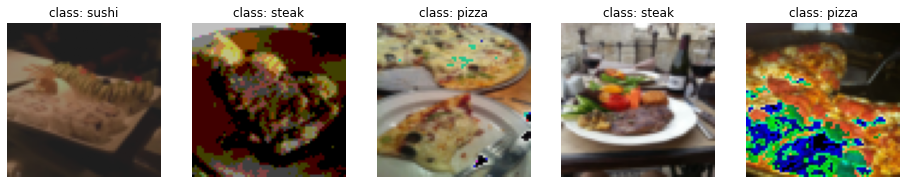

In [24]:
def display_random_images(
    dataset: torch.utils.data.Dataset,
    n: int = 5,
    seed: int = None,
):

    if seed: 
        random.seed(seed)
    
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    plt.figure(figsize=(16, 8))

    for i, sample_idx in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[sample_idx]

        targ_image_permute = targ_image.permute(1,2,0)

        plt.subplot(1,n, i+1)
        plt.imshow(targ_image_permute)
        plt.axis(False)

        plt.title(f"class: {dataset.classes[targ_label]}")

display_random_images(train_data)

In [25]:
train_dataloader = DataLoader(train_data, 
                              batch_size=1,
                              shuffle=True)

test_dataloader = DataLoader(test_data, 
                              batch_size=1,
                              shuffle=False)

img, label = next(iter(train_dataloader))
img.shape, label.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

In [26]:
transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
])

In [27]:
train_data = ImageFolderCustom(train_dir, transform)
test_data = ImageFolderCustom(test_dir, transform)

train_dataloader = DataLoader(train_data,
                              batch_size=32,
                              shuffle=True)

test_dataloader = DataLoader(test_data,
                              batch_size=32,
                              shuffle=False)

In [28]:
class TinyVGG(nn.Module):
    def __init__(self, input: int, hidden: int, output: int) -> None:
        super().__init__()
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(
                in_channels = input,
                out_channels = hidden,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels = hidden,
                out_channels = hidden,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.MaxPool2d(
                kernel_size=2,
                stride=2,
                ),
        )

        self.conv_block2 = nn.Sequential(
            nn.Conv2d(
                in_channels = hidden,
                out_channels = hidden,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels = hidden,
                out_channels = hidden,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.MaxPool2d(
                kernel_size=2,
                stride=2,
                ),
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(
                in_features=hidden*16*16, 
                out_features=output,
                ),
        )

    def forward(self, x: torch.Tensor):
        return self.classifier(self.conv_block2(self.conv_block1(x)))

model = TinyVGG(3, 10, len(train_data.classes)).to(device)
model

TinyVGG(
  (conv_block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [29]:
img_batch, label_batch = next(iter(train_dataloader))

img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
img_single.shape, label_single.shape

(torch.Size([1, 3, 64, 64]), torch.Size([]))

In [30]:
model.eval()
with torch.inference_mode():
    pred = model(img_single.to(device))

prob = torch.softmax(pred, dim=1)
pred_label = torch.argmax(prob, dim=1)
pred_label, label_single

(tensor([0]), tensor(2))

In [31]:
!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
from torchinfo import summary

summary(model, input_size=[1,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

In [33]:
def train_step(model: nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              optimizer: torch.optim.Optimizer):
    
    model.train()
    train_loss, train_acc = 0, 0

    for X, y in dataloader:

        X, y = X.to(device), y.to(device)

        pred = model(X)

        loss = loss_fn(pred, y)
        train_loss+=loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        pred_class = torch.argmax(torch.softmax(pred, dim=1), dim=1)
        train_acc += (pred_class==y).sum().item()/len(pred_class)
    
    train_loss = train_loss/len(dataloader)    
    train_acc = train_acc/len(dataloader)  
    return train_loss, train_acc

In [34]:
def test_step(model: nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    
    model.eval()
    test_loss, test_acc = 0, 0

    with torch.inference_mode():

        for X, y in dataloader:

            X, y = X.to(device), y.to(device)

            pred = model(X)

            loss = loss_fn(pred, y)
            test_loss+=loss.item()

            pred_class = torch.argmax(torch.softmax(pred, dim=1), dim=1)
            test_acc+= (pred_class==y).sum().item()/len(pred_class)

    test_loss = test_loss/len(dataloader)    
    test_acc = test_acc/len(dataloader)   
    return test_loss, test_acc

In [35]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          loss_fn: torch.nn.Module,
          optimizer: torch.optim.Optimizer,
          epochs: int = 5):
    
    results = {"train loss":[],
               "train acc":[],
               "test loss":[],
               "test acc":[]
               }
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model, 
                                           train_dataloader, 
                                           loss_fn, 
                                           optimizer)
        test_loss, test_acc = test_step(model, 
                                        train_dataloader, 
                                        loss_fn)
        
        results["train loss"].append(train_loss)
        results["train acc"].append(train_acc)
        results["test loss"].append(test_loss)
        results["test acc"].append(test_acc)
    
    return results

In [36]:
from timeit import default_timer as timer

NUM_EPOCHS = 100

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=1e-3)

start = timer()

model_results = train(model,
                      train_dataloader,
                      test_dataloader,
                      loss_fn,
                      optimizer, 
                      NUM_EPOCHS)

end = timer()
print(f"training time: {end-start:.3f} seconds")

  0%|          | 0/100 [00:00<?, ?it/s]

training time: 345.939 seconds


In [37]:
def plot_loss_curves(results: Dict[str, List[float]]):

    train_loss = results["train loss"]
    train_acc = results["train acc"]
    test_loss = results["test loss"]
    test_acc = results["test acc"]

    epochs = range(len(train_loss))

    plt.figure(figsize=(15,7))

    plt.subplot(1,2,1)
    plt.plot(epochs, train_loss, label="train loss")
    plt.plot(epochs, test_loss, label="test loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(epochs, train_acc, label="train acc")
    plt.plot(epochs, test_acc, label="test acc")
    plt.title("Acc")
    plt.xlabel("Epochs")
    plt.legend()

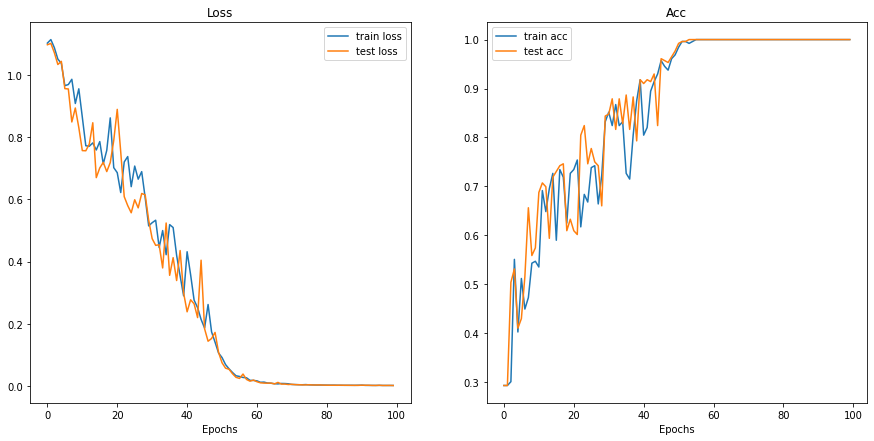

In [38]:
plot_loss_curves(model_results)

In [39]:
import torchvision

def pred(model: torch.nn.Module,
         url: str,
         class_names: List[str] = None,
         transform=None,
         device: torch.device = device):
    
    img_path = "test.jpeg"

    with open(img_path, "wb") as f:
            request = requests.get(url)
            f.write(request.content)
    
    img = torchvision.io.read_image(img_path).type(torch.float32)
    img = img/255

    if transform:
        img = transform(img)

    model.to(device)
    model.eval()
    with torch.inference_mode():
        logits = model(img.unsqueeze(dim=0).to(device))
        pred_label = torch.argmax(torch.softmax(logits, dim=1), dim=1)
        
    plt.imshow(img.permute(1,2,0))
    if class_names:
        title = f"Pred: {class_names[pred_label.cpu()]}"
    else:
        title = f"Pred: {pred_label}"
    plt.title(title)
    plt.axis=(False)

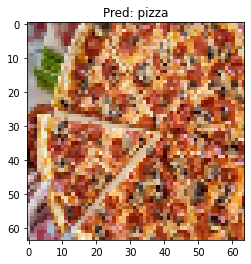

In [40]:
transform = transforms.Resize((64,64))
url = "https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.aPgW1MdLl_v98QCS2CITQAHaE7%26pid%3DApi&f=1&ipt=2000fed1cfe20048000afe8ab1416c046872f2c250c18fce786237eab2c27ad5&ipo=images"

pred(model,
     url,
     class_names,
     transform,
     device)